# Introduction to Computer Vision

## Session 2: Image Processing Basics (3 hours)

In [1]:
import os  # Builtin
import warnings  # Builtin
import cv2  # pip install opencv-python
import pandas as pd  # pip install pandas
import numpy as np # pip install numpy
import matplotlib.pyplot as plt # pip install matplotlib
import scipy.stats as stats # pip install scipy

from plot_layers import imshow

warnings.simplefilter("ignore")
%matplotlib inline

In [2]:
cv2.__version__

'4.6.0'

In [3]:
IS_IN_GOOGLE_COLAB = False
DRIVE_PATH = None  # starts with `/content/drive/<path inside the drive>`
LOCAL_DATA_PATH = os.path.join(os.path.abspath(''), 'data')

In [4]:
if IS_IN_GOOGLE_COLAB:
    if DRIVE_PATH is None:
        raise ValueError("Expected a path in DRIVE_PATH but got None")
    from google.colab import drive
    from google.colab.patches import cv2_imshow
    drive.mount(DRIVE_PATH)
    imshow = cv2.imshow

### Basics: Operations using openCV: Loading image

In [5]:
img = cv2.imread(os.path.join(LOCAL_DATA_PATH, 'images', 'cameraman.png'))
img.shape

(256, 256, 3)

In [6]:
# imshow(img, inline=False)

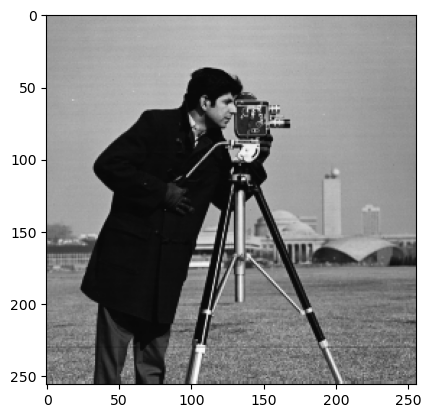

In [7]:
imshow(img)

In [8]:
img = img[:, :, 0]
img.shape

(256, 256)

In [9]:
img.dtype

dtype('uint8')

### Basics: Operations using openCV: Brightness

In [10]:
img1 = img.astype('float')
img2 = img1 + 100
img2[img2 > 255] = 255  # max should be 255

img1[0, 0], img2[0, 0]

(156.0, 255.0)

In [11]:
img_h = np.concatenate([img1, img2], axis=1)
# or
# img_h = np.hstack((img1,img2))
img_h.shape

(256, 512)

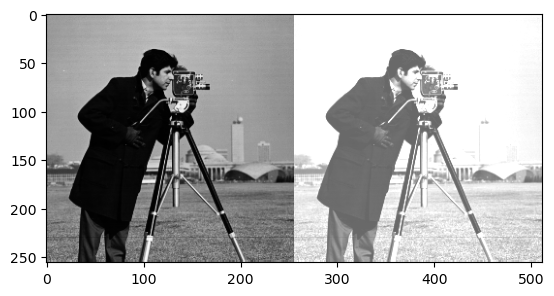

In [12]:
imshow(img_h)

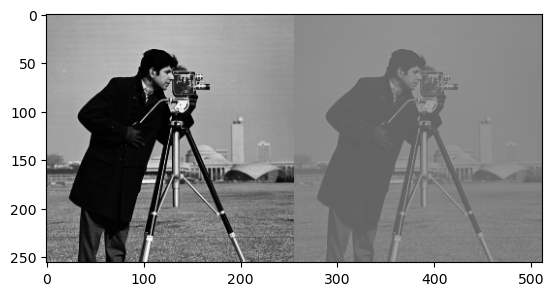

In [13]:
img1 = img.astype('float')
img2 = (img1 * .25) + 100
img2[img2 > 255] = 255  # max should be 255

img_h = np.hstack((img1,img2))
imshow(img_h)

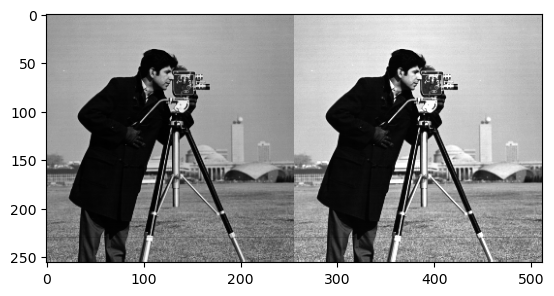

In [14]:
img1 = img.astype('float')
img2 = (img1 * 1.25)
img2[img2 > 255] = 255  # max should be 255

img_h = np.hstack((img1,img2))
imshow(img_h)

### Basics: Operations using openCV: Scaling

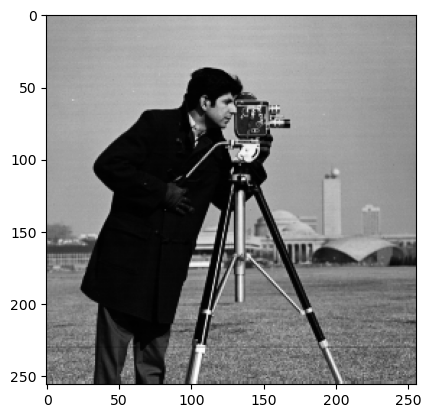

In [15]:
img_scaled = img.astype('float') / 255 # min -> 0, max -> 1
imshow(img_scaled)

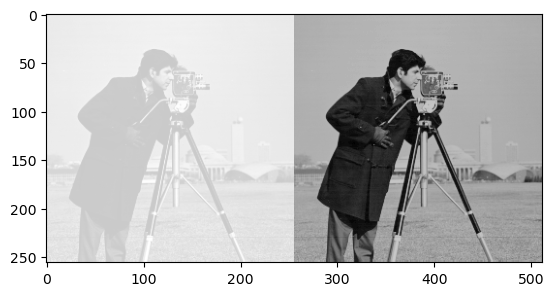

In [16]:
img_log = np.log(img_scaled)  # Enhanced Low-Light Details, Noise Reduction, Visual Enhancement, Normalization
res_img = np.hstack((img_scaled, img_log))
imshow(res_img)

In [17]:
img_scaled[0, 0], img_log[0, 0]

(0.611764705882353, -0.491407537908889)

In [18]:
np.exp(img_log[0, 0]) == img_scaled[0, 0]

True

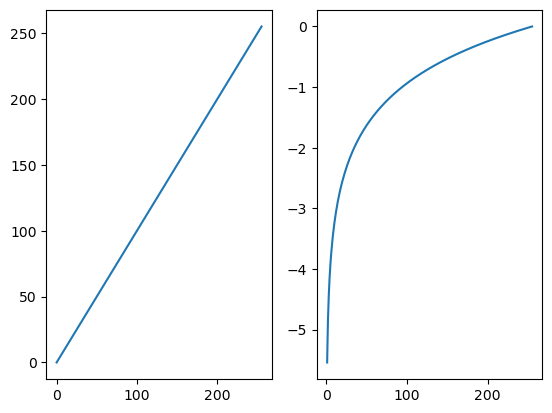

In [19]:
a = np.arange(0, 256, 1)
f, ax = plt.subplots(1, 2)
ax = ax.flatten()
ax[0].plot(a)
ax[1].plot(np.log(a/255))
plt.show()

### Basics: Operations using openCV: Inverting

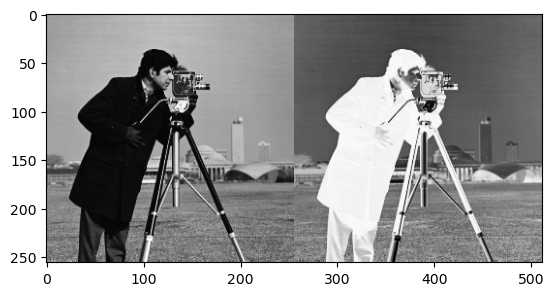

In [20]:
img1 = img.astype('float')
img2 = 255 - img1
res_img = np.hstack((img1, img2))
imshow(res_img)

### Basics: Operations using openCV: Equilization

In [21]:
fruit = cv2.imread(os.path.join(LOCAL_DATA_PATH, 'images', 'fruit_basket.jpg'), 0)  # low contrast image
# Note: 0 as 2nd arg to imread make sure to load only 1 channel (grayscale)
fruit.shape

(131, 131)

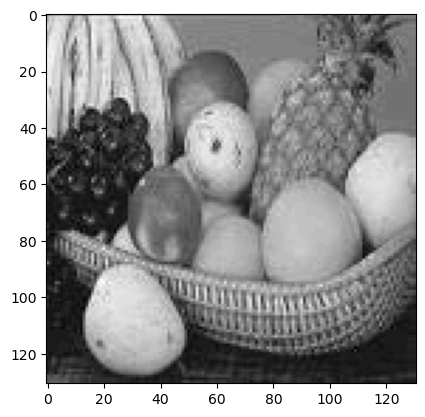

In [22]:
imshow(fruit)

In [23]:
fruit.min(), fruit.max()

(92, 141)

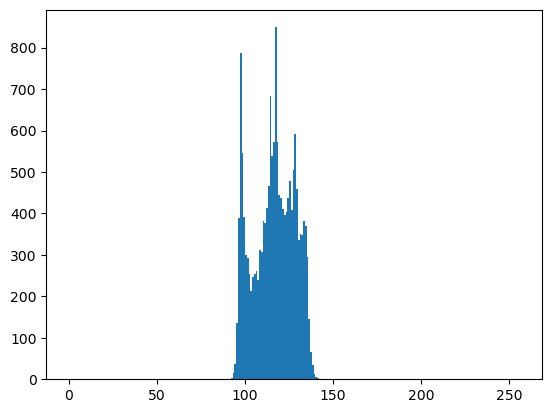

In [24]:
plt.hist(fruit.ravel(), bins=256, range=(0, 256))  # seeing the distribution
plt.show()

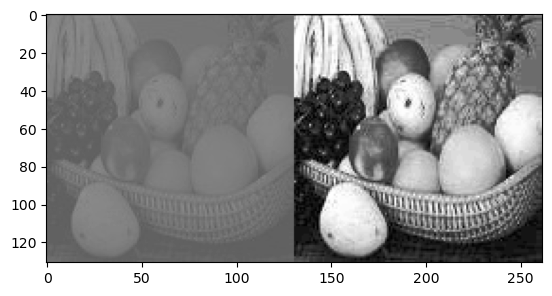

In [25]:
img_eq = cv2.equalizeHist(fruit)
res_img = np.hstack((fruit, img_eq)) #. comparing original low contrast image with equilized image.
imshow(res_img)

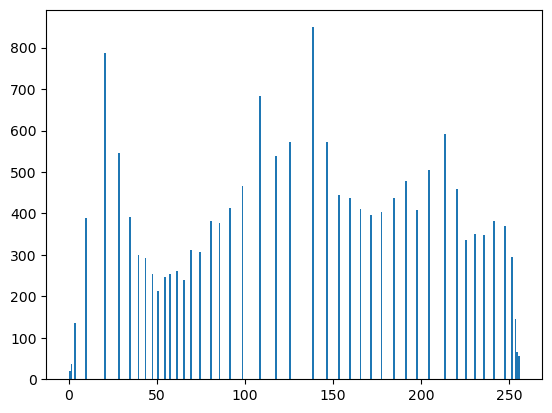

In [26]:
plt.hist(img_eq.ravel(), bins=256, range=(0,256))  # seeing equilized image distribution
plt.show()

### Basics: Operations using openCV: Filters

In [27]:
lungs = cv2.imread(os.path.join(LOCAL_DATA_PATH, 'images', 'lungs.jpg'), 0)  # noisy image
# Note: 0 as 2nd arg to imread make sure to load only 1 channel (grayscale)
lungs.shape

(512, 512)

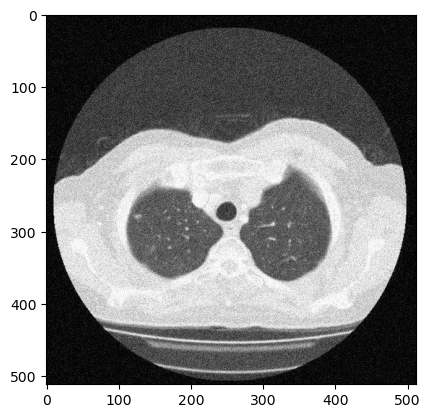

In [28]:
imshow(lungs)

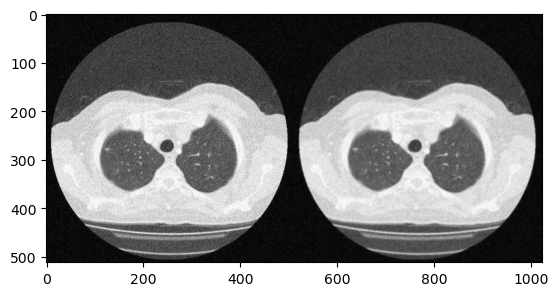

In [29]:
kernel = np.ones((3,3),dtype='float') / 9  # kernels are also called as masks
filtered_img = cv2.filter2D(lungs, -1, kernel)
# Note: this actually compute correlation, not the convolution
res_img = np.hstack((lungs, filtered_img))
imshow(res_img)

In [30]:
lungs[0, 0], filtered_img[0, 0]

(1, 12)

In [31]:
lungs_1 = cv2.imread(os.path.join(LOCAL_DATA_PATH, 'images', 'lungs_1.jpg'), 0) # clean image
# Note: 0 as 2nd arg to imread make sure to load only 1 channel (grayscale)
lungs_1.shape

(512, 512)

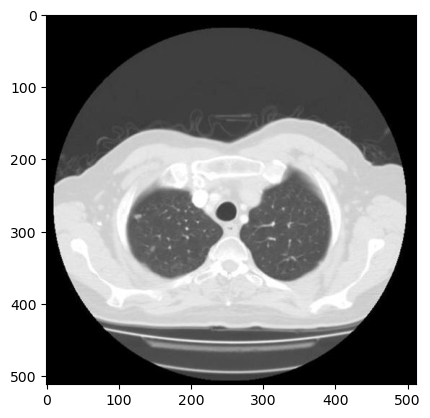

In [32]:
imshow(lungs_1)

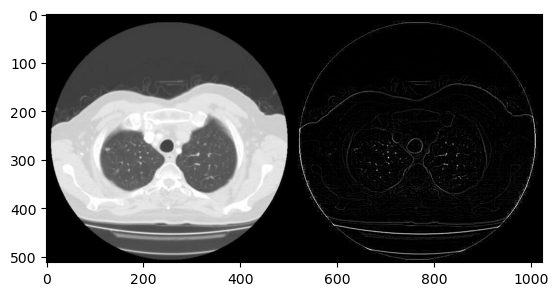

In [33]:
outline_kernal = np.matrix('-1 -1 -1;-1 8 -1;-1 -1 -1')
filtered_img = cv2.filter2D(lungs_1, -1, outline_kernal)
# Note: this actually compute correlation, not the convolution
res_img = np.hstack((lungs_1, filtered_img))
imshow(res_img)

### Basics: Operations using openCV: Morphology

In [34]:
brain = cv2.imread(os.path.join(LOCAL_DATA_PATH, 'images', 'brain_mri.jpg'), 0)
# Note: 0 as 2nd arg to imread make sure to load only 1 channel (grayscale)
brain.shape

(387, 434)

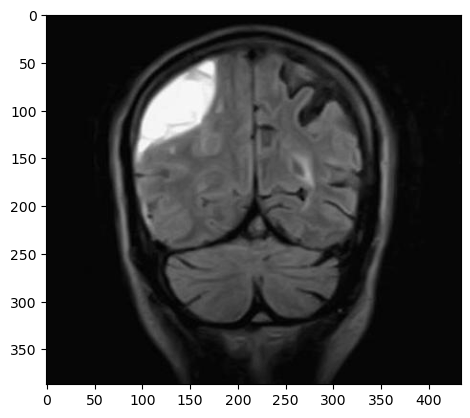

In [35]:
imshow(brain)

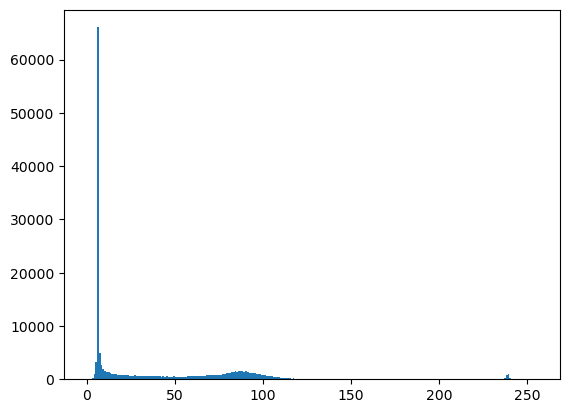

In [36]:
plt.hist(brain.ravel(), bins=256, range=(0, 256))
plt.show()

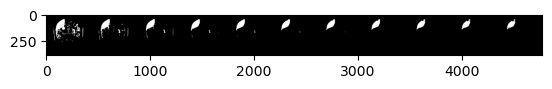

In [37]:
offset = 100
tumors = None
for offset in range(100, 201, 10):
    tumor = brain.astype('float')
    tumor[tumor > offset] = 255
    tumor[tumor <= offset] = 0
    if tumors is None:
        tumors = tumor
    else:
        tumors = np.hstack((tumors, tumor))
imshow(tumors)

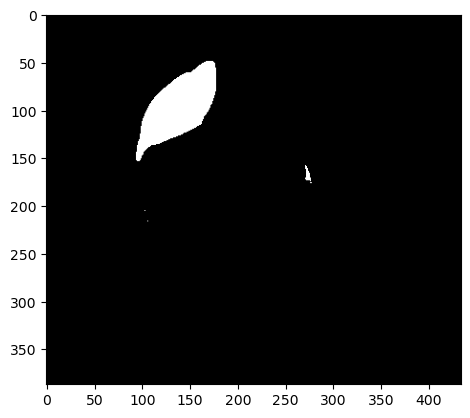

In [38]:
offset = 150
tumor = brain.astype('float')
tumor[tumor > offset] = 255
tumor[tumor <= offset] = 0
imshow(tumor)

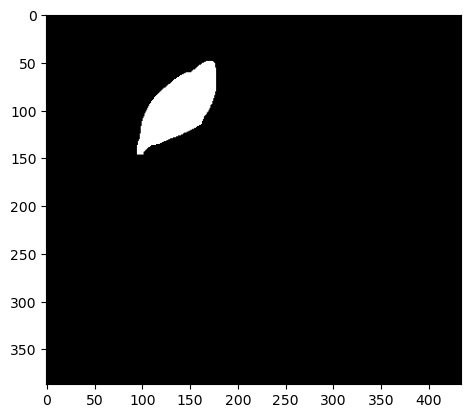

In [39]:
kernel_size = (7, 7)
structuring_element = cv2.getStructuringElement(shape=cv2.MORPH_RECT, ksize=kernel_size)
kernel = cv2.morphologyEx(src=tumor, op=cv2.MORPH_OPEN, kernel=structuring_element)
kernel = kernel.astype('uint8')
imshow(kernel)

### Basics: Operations using openCV: Feature Extraction

In [40]:
area = (kernel != 0).sum()
area

4326

In [41]:
# count the number of non zero pixels in each row in the image and pick the max count.
max_height = (kernel != 0).sum(axis=0).max()
# count the number of non zero pixels in each column in the image and pick the max count.
max_width = (kernel != 0).sum(axis=1).max()
max_height, max_width

(63, 65)

In [42]:
# Eccentricity
eccentricity = max_height / max_width
eccentricity

0.9692307692307692

358

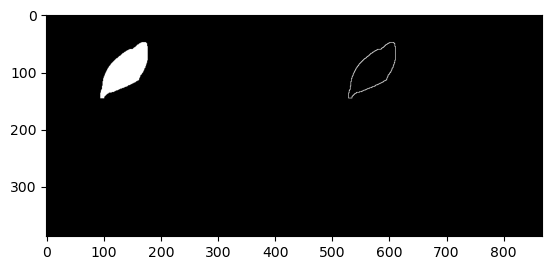

In [43]:
# computing perimeter of the kernel/tumor
outline_kernal = np.matrix('-1 -1 -1;-1 8 -1;-1 -1 -1')
outline = cv2.filter2D(kernel, -1, outline_kernal)
res_img = np.hstack((kernel, outline))
imshow(res_img)
perimeter = (outline != 0).sum()
perimeter

In [44]:
# finding Centroid
moments = cv2.moments(kernel)
# In geometry and image processing, the moments of a polygon or an image are a set of 
# mathematical descriptors that capture various properties of the shape, such as its centroid, 
# area, and moments of inertia. These moments provide valuable information for tasks such as 
# shape analysis, pattern recognition, and object detection. The moments of a polygon are computed 
# based on the spatial distribution of its pixels or vertices.
# Ref: https://en.wikipedia.org/wiki/Image_moment
#      https://theailearner.com/2020/10/16/image-moments/
x_cent = np.round(moments['m10'] / moments['m00'])
y_cent = np.round(moments['m01'] / moments['m00'])
x_cent, y_cent

(139.0, 96.0)

In [45]:
# finding contours; contour area, hull area and min enclosing radius.
contours, _ = cv2.findContours(kernel, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
cnt = contours[0]
cnt_ar = cv2.contourArea(cnt)

In [46]:
# The convex hull is a way of characterizing the shape of an image by determining
# which pixels are adjacent to other pixels of the same intensity
hull = cv2.convexHull(cnt)
hull_ar = cv2.contourArea(hull)

In [47]:
# minimum enclosing radius.
(x, y), rad = cv2.minEnclosingCircle(cnt)

In [48]:
print(f"Contour area: {cnt_ar},\nHull area: {hull_ar},\nHinimum enclosing radius: {rad}")

Contour area: 4198.0,
Hull area: 4395.5,
Hinimum enclosing radius: 62.550079345703125


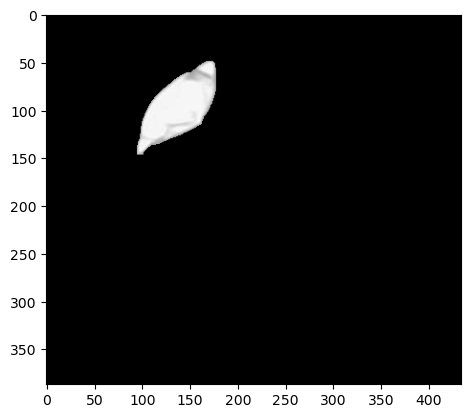

In [49]:
# extracting features of tumor
kernel = kernel / 255  # Scaling: min -> 0, max -> 1
tumor = brain * kernel
imshow(tumor)

In [50]:
# mean, var, std, skew
tumor_pixels = tumor[tumor!=0]
mean = np.mean(tumor_pixels)
var = np.var(tumor_pixels)
std = np.std(tumor_pixels)
skew = stats.skew(tumor_pixels)
print(f"Mean: {mean},\nVariance: {var},\nStd: {std}, and\nSkew: {skew}")

Mean: 224.0131761442441,
Variance: 541.638522644424,
Std: 23.27312876783919, and
Skew: -1.6066267688527718


In [51]:
features = pd.DataFrame(
    [[area, max_height, max_width, eccentricity, 
     perimeter, x_cent, y_cent, cnt_ar, hull_ar, rad, mean, var, std, skew]],
    index=['img1'],
    columns=["AreaRoI", "Max Height", "Max Width", "Eccentricity", "Perimeter", "Centroid(X)", 
            "Centroid(Y)", "Contour Area", "Hull Area", "Min Enclosing Radius", "Mean", "Variance",
            "Standard Deviation", "Skew"]
)
features

,AreaRoI,Max Height,Max Width,Eccentricity,Perimeter,Centroid(X),Centroid(Y),Contour Area,Hull Area,Min Enclosing Radius,Mean,Variance,Standard Deviation,Skew
img1,4326,63,65,0.969231,358,139.0,96.0,4198.0,4395.5,62.550079,224.013176,541.638523,23.273129,-1.606627


In [52]:
features.shape

(1, 14)

### Key Areas: Neural Networks: Linear equation to non-linear equations

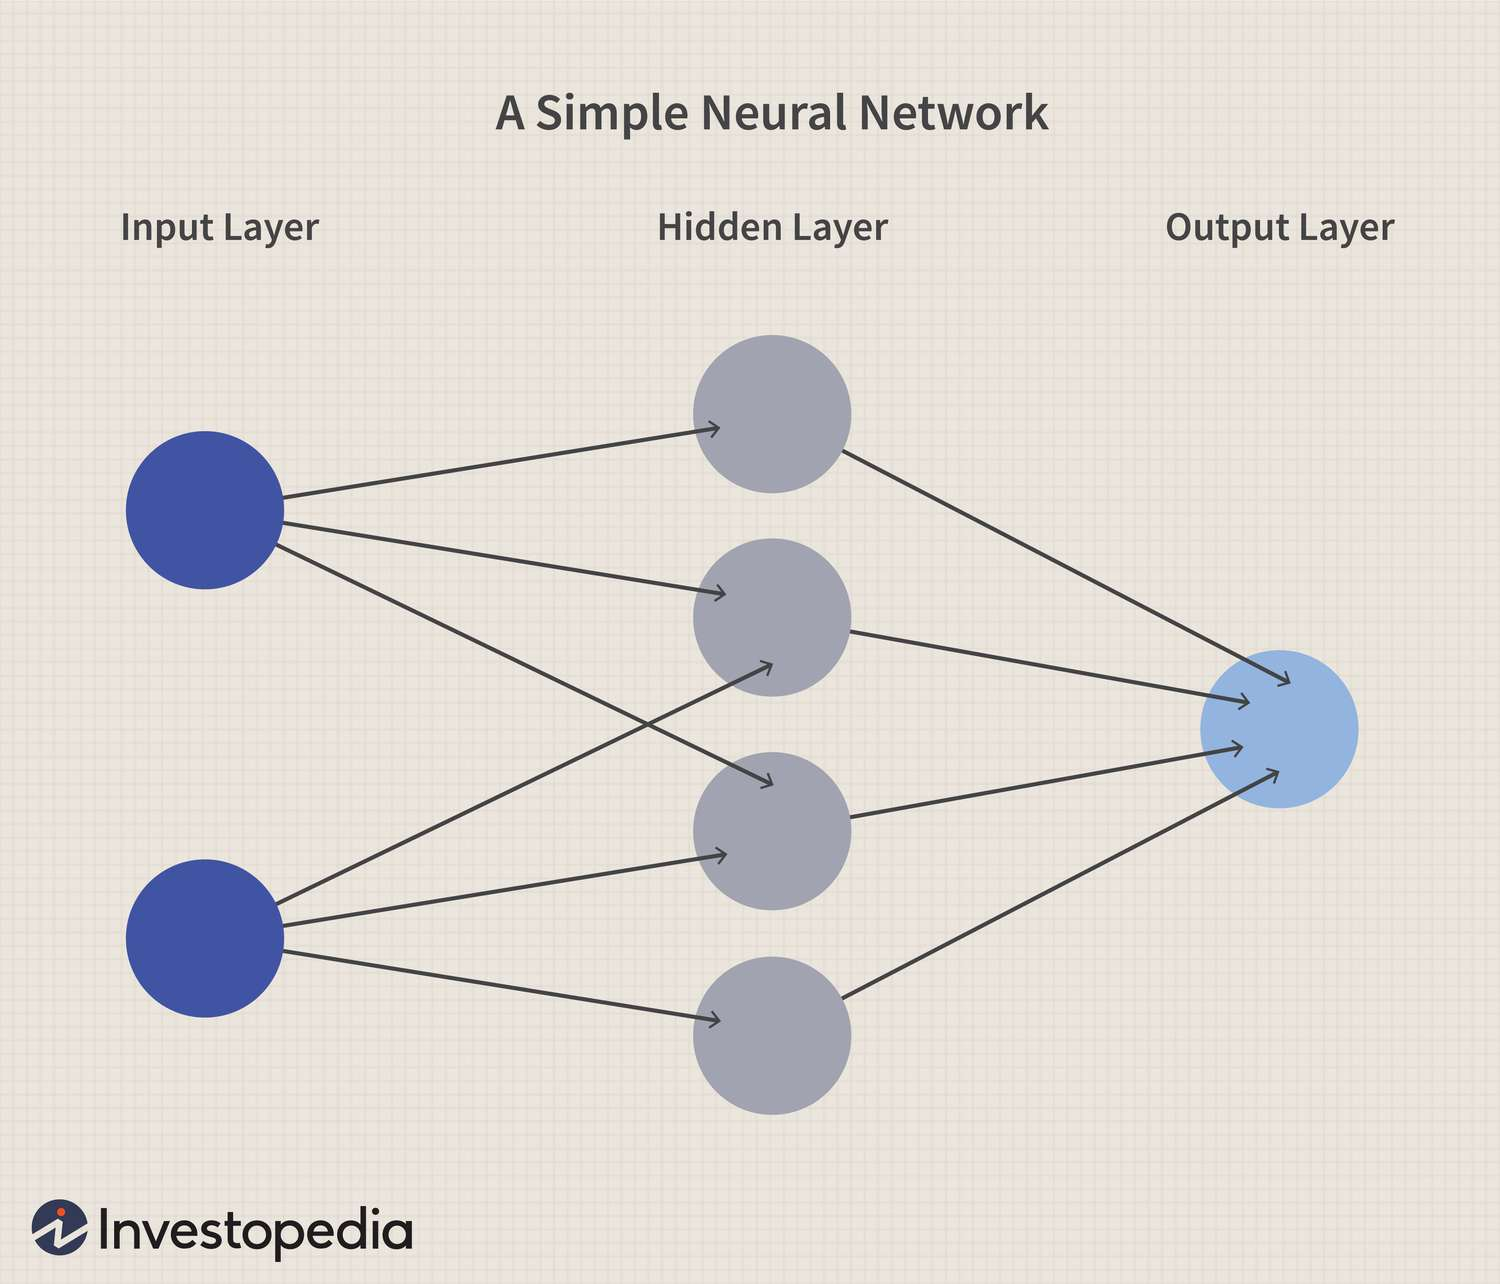

### Key Areas: Neural Networks: Convolution Neural Networks: Difference b/w NN and CNN